In [31]:
import pandas as pd
df_train, df_test= pd.read_csv('train.csv'), pd.read_csv('test.csv')

In [2]:
#查看前5行数据
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:xlabel='Sex', ylabel='Survived'>

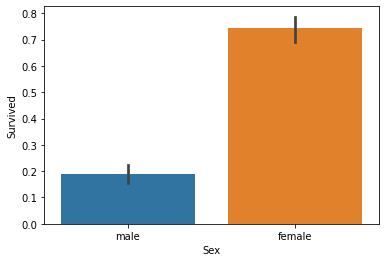

In [9]:
import seaborn as sns

sns.barplot(x="Sex",y="Survived",data=df_train)

<AxesSubplot:xlabel='Parch', ylabel='Survived'>

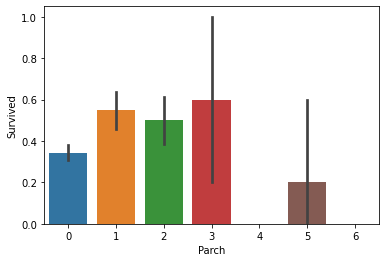

In [10]:
sns.barplot(x="Parch",y="Survived",data=df_train)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

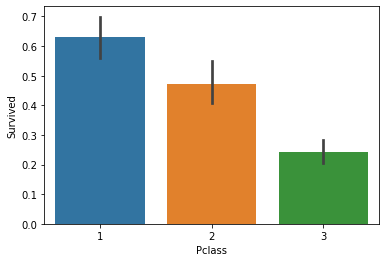

In [11]:
sns.barplot(x="Pclass",y="Survived",data=df_train)

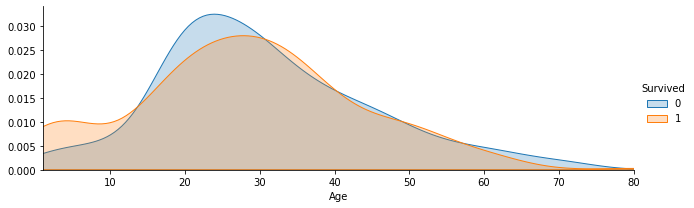

In [17]:
facet = sns.FacetGrid(df_train,hue="Survived",aspect=3)
facet.map(sns.kdeplot,"Age",shade=True)
facet.set(xlim=(1,df_train["Age"].max()))
facet.add_legend()

<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

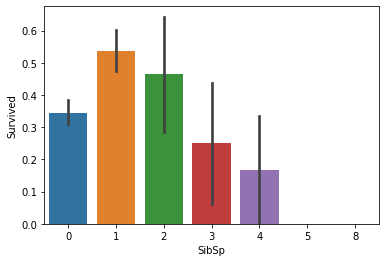

In [19]:
sns.barplot(x="SibSp",y="Survived",data=df_train)

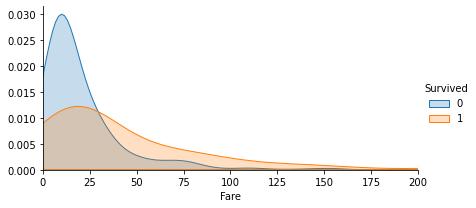

In [21]:
facet = sns.FacetGrid(df_train, hue="Survived",aspect=2)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, 200))
facet.add_legend()

In [29]:

def pre_operate(data):
    data=data.drop(["Cabin","Ticket","Name"],axis=1) #将Ticket Name Cabin删除
    data["Age"] = data["Age"].fillna(data["Age"].mean()) #将Age的缺失4值该列的平均值
    data=data.dropna()#删除掉有缺失值(Embarked)的行
    #将object类型转为int类型，来便于处理
    data["Sex"]=(data["Sex"]=='male').astype(int)
    ls=data["Embarked"].unique().tolist()
    data["Embarked"]=data["Embarked"].apply(lambda x:ls.index(x))
    return data


In [32]:
df_train=pre_operate(df_train)
df_test =pre_operate(df_test)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    int64  
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 69.5 KB


In [37]:
X_train = df_train.loc[:,df_train.columns!="Survived"]#将数据和标记分开
Y_train = df_train.loc[:,df_train.columns=="Survived"]

X_test = df_test.loc[:,df_test.columns!="Survived"]
Y_test = df_test.loc[:,df_test.columns=="Survived"]

X_train.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,1,22.0,1,0,7.2500,0
1,2,1,0,38.0,1,0,71.2833,1
2,3,3,0,26.0,0,0,7.9250,0
3,4,1,0,35.0,1,0,53.1000,0
4,5,3,1,35.0,0,0,8.0500,0


In [38]:
Y_train.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [40]:
from sklearn import tree
from sklearn.model_selection import GridSearchCV  #网格搜索

In [41]:
params={
        "splitter":("best","random")
         ,"criterion":("gini","entropy")
         ,"max_depth":[*range(1,8)]
         ,"min_samples_leaf":[*range(5,21,5)]
        }
clf=tree.DecisionTreeClassifier()
GS=GridSearchCV(clf,params,cv=5)
GS.fit(X_train,Y_train)
print(GS.best_params_)  #最佳参数
print(GS.best_score_)  #最优评分（对应最佳参数）


{'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 5, 'splitter': 'best'}
0.823411413698978
